<a href="https://colab.research.google.com/github/Niranjana-08/AI-Ascent/blob/main/notebooks/analysis/visualization_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook Objective :**


*   This notebook serves as the final stage of our analysis, focusing on data visualization. Using the cleaned and classified datasets prepared in the previous steps, we will create a series of insightful charts further used in creating the analysis dashboard.
*    These visualizations are designed to uncover key trends in the job market, particularly concerning the impact of AI, salary distributions, in-demand skills, and geographic demand.




## Setup and Data Loading

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display
import matplotlib.ticker as mticker

## Data

In [43]:
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)

Mounting Google Drive...
Mounted at /content/drive


In [44]:
base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'

In [45]:
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'
modeling_file_path = data_folder + 'analysis_ready_with_combinedtext.csv'

In [46]:
category_summary_path = analysis_folder + 'summary_by_main_category.csv'
experience_summary_path = analysis_folder + 'summary_by_experience.csv'
salary_range_summary_path = analysis_folder + 'summary_salary_range.csv'
salary_median_summary_path = analysis_folder + 'summary_salary_median.csv'
top_locations_summary_path = analysis_folder + 'summary_top_locations.csv'
overall_skills_summary_path = analysis_folder + 'summary_overall_top_skills.csv'
skills_per_category_summary_path = analysis_folder + 'summary_skills_per_category.csv'

In [47]:
print("\nLoading all necessary datasets...")
try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    modeling_df = pd.read_csv(modeling_file_path)
    print("Main datasets loaded.")

    category_summary_df = pd.read_csv(category_summary_path)
    experience_summary_df = pd.read_csv(experience_summary_path)
    salary_range_df = pd.read_csv(salary_range_summary_path)
    salary_median_df = pd.read_csv(salary_median_summary_path)
    top_locations_df = pd.read_csv(top_locations_summary_path)
    overall_skills_df = pd.read_csv(overall_skills_summary_path)
    skills_per_category_df = pd.read_csv(skills_per_category_summary_path)
    print("All summary tables loaded successfully!")

except FileNotFoundError as e:
    print(f"\nError: A file was not found. Please check your folder and file names.")
    print(f"Details: {e}")
    raise e


Loading all necessary datasets...
Main datasets loaded.
All summary tables loaded successfully!


In [48]:
print("\n--- Verification: Displaying a sample of loaded data ---")
print("\n1. Main Dashboard DataFrame (dashboard_df):")
display(dashboard_df.head(2))

print("\n2. Category Summary (category_summary_df):")
display(category_summary_df.head(2))


--- Verification: Displaying a sample of loaded data ---

1. Main Dashboard DataFrame (dashboard_df):


,job_id,title,company_name,location,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,cleaned_skills,state_code
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,Not Specified,17.0,0.0,20.0,HOURLY,"Marketing, Sales",NJ
1,1829192,Mental Health Therapist/Counselor,Unknown,"Fort Collins, CO",Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,Not Specified,30.0,0.0,50.0,HOURLY,Health Care Provider,CO



2. Category Summary (category_summary_df):


,main_category,total_jobs,percentage_of_total,average_ai_score,core_ai_jobs,ai_impacted_jobs,traditional_jobs
0,Technology,17734,20.359103,0.311567,93,17641,0
1,Consulting & Strategy,15641,17.956283,0.270074,731,3563,11347


### 1. Visualizing Job Distribution by Category

/tmp/ipython-input-3059460487.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




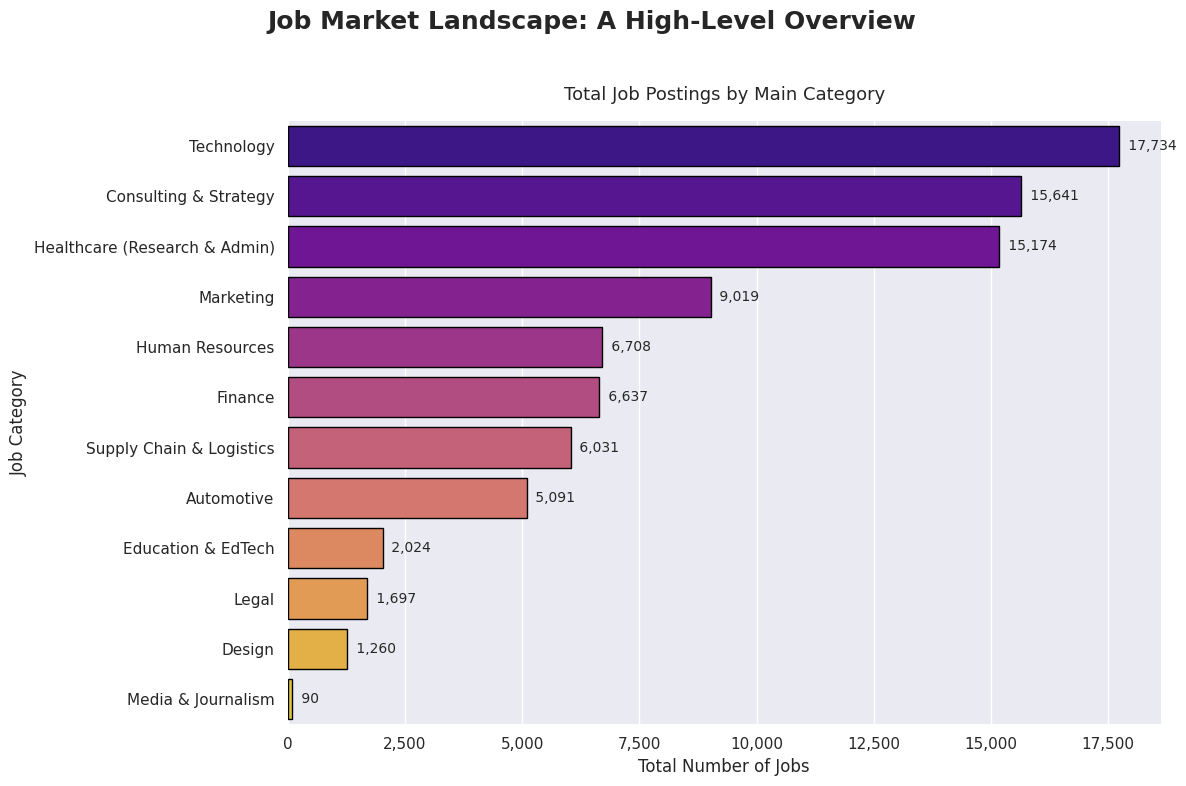

Enhanced chart saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/jobs_by_category_enhanced.png


In [49]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x='total_jobs',
    y='main_category',
    data=category_summary_df,
    palette='plasma',
    orient='h',
    ax=ax,
    edgecolor='black'
)

fig.suptitle('Job Market Landscape: A High-Level Overview', fontsize=18, fontweight='bold')
ax.set_title('Total Job Postings by Main Category', fontsize=13, y=1.02)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax.set_xlabel('Total Number of Jobs', fontsize=12)
ax.set_ylabel('Job Category', fontsize=12)

for index, value in enumerate(category_summary_df['total_jobs']):
    ax.text(value + 100, index, f' {value:,}', va='center', fontsize=10)
sns.despine(left=True, bottom=True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
output_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/jobs_by_category_enhanced.png'
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Enhanced chart saved to: {output_path}")

# --- Optional: Reset theme back to default for other plots ---
# sns.set_theme(style="whitegrid")

### 2. Visualizing Experience Level Distribution

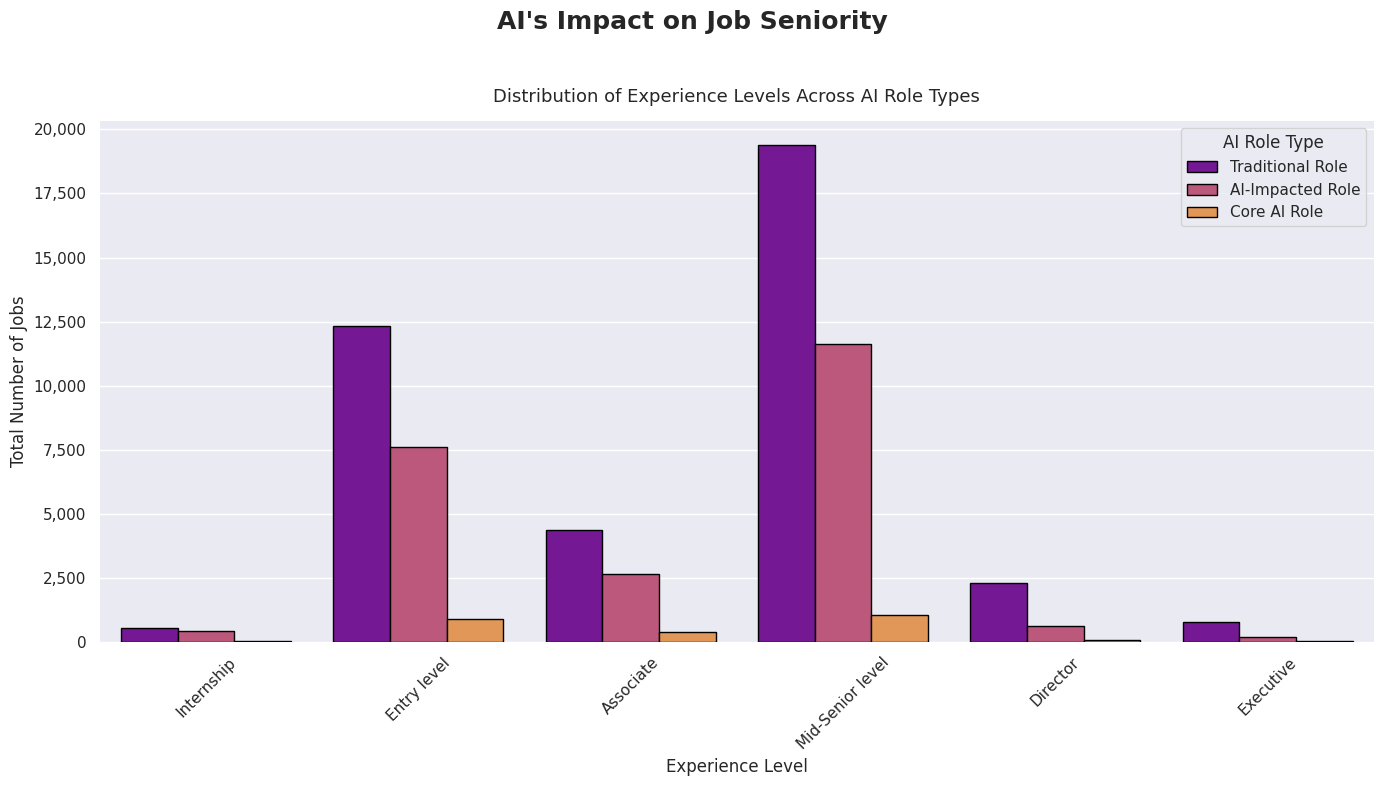


Note: The analysis above considers only the 65176 jobs out of the 123849 total jobs that had a specified experience level.
Chart saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/experience_by_ai_role.png


In [50]:
experience_order = [
    'Internship',
    'Entry level',
    'Associate',
    'Mid-Senior level',
    'Director',
    'Executive'
]

role_type_order = [
    'Traditional Role',
    'AI-Impacted Role',
    'Core AI Role'
]

plot_df = experience_summary_df[experience_summary_df['formatted_experience_level'].isin(experience_order)]


# --- Creating grouped bar chart : Counting the jobs with a specified experience level
jobs_with_experience_count = experience_summary_df['total_jobs'].sum()
total_job_count = len(dashboard_df)

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(
    x='formatted_experience_level',
    y='total_jobs',
    hue='ai_role_type',
    data=plot_df,
    palette='plasma',
     edgecolor='black',
    order=experience_order,
    hue_order=role_type_order,
    ax=ax
)

fig.suptitle('AI\'s Impact on Job Seniority', fontsize=18, fontweight='bold')
ax.set_title('Distribution of Experience Levels Across AI Role Types', fontsize=13, y=1.02)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
ax.set_xlabel('Experience Level', fontsize=12)
ax.set_ylabel('Total Number of Jobs', fontsize=12)
ax.legend(title='AI Role Type')
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
output_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/experience_by_ai_role.png'
plt.savefig(output_path, dpi=300)
plt.show()

print(f"\nNote: The analysis above considers only the {jobs_with_experience_count} jobs "
      f"out of the {total_job_count} total jobs that had a specified experience level.")


print(f"Chart saved to: {output_path}")

### 3. Visualize Salary Comparison



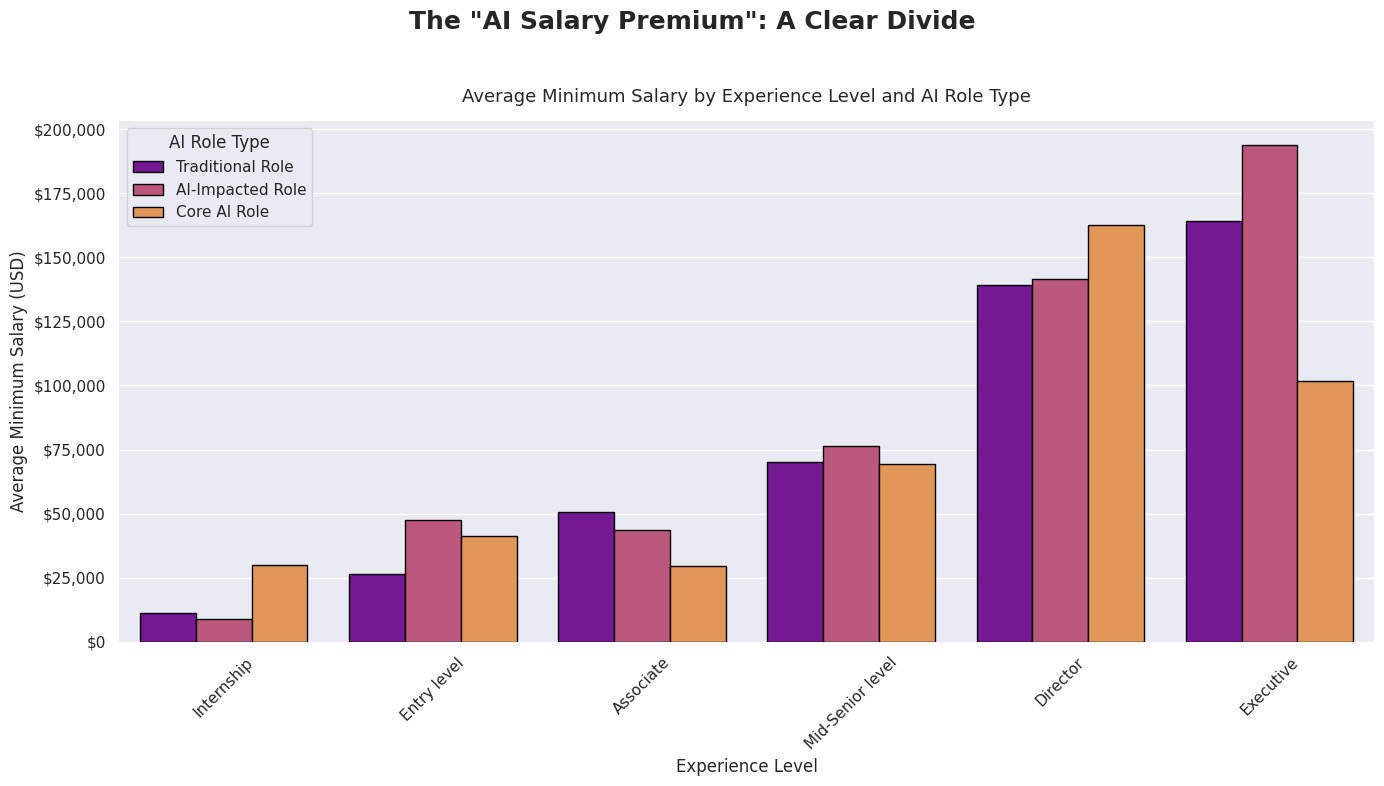


Note: The salary analysis above is based on the 23096 jobs out of the 123849 total jobs that provided salary information.


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

experience_order = [
    'Internship', 'Entry level', 'Associate',
    'Mid-Senior level', 'Director', 'Executive'
]
role_type_order = [
    'Traditional Role', 'AI-Impacted Role', 'Core AI Role'
]

plot_df = salary_range_df[salary_range_df['formatted_experience_level'].isin(experience_order)]
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(
    x='formatted_experience_level',
    y='average_minimum_salary',
    # Using the average minimum salary for comparison
    hue='ai_role_type',
    data=plot_df,
    palette='plasma',
    edgecolor='black',
    order=experience_order,
    hue_order=role_type_order,
    ax=ax
)

fig.suptitle('The "AI Salary Premium": A Clear Divide', fontsize=18, fontweight='bold')
ax.set_title('Average Minimum Salary by Experience Level and AI Role Type', fontsize=13, y=1.02)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'${int(y):,}'))

ax.set_xlabel('Experience Level', fontsize=12)
ax.set_ylabel('Average Minimum Salary (USD)', fontsize=12)
ax.legend(title='AI Role Type')
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.tight_layout(rect=[0, 0, 1, 0.96])

output_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/salary_by_ai_role.png'
plt.savefig(output_path, dpi=300)
plt.show()

jobs_with_salary_count = salary_range_df['total_jobs'].sum()
total_job_count = len(dashboard_df)

print(f"\nNote: The salary analysis above is based on the {jobs_with_salary_count} jobs "
      f"out of the {total_job_count} total jobs that provided salary information.")

### 4. Treemap for technology job category

In [52]:
!pip install squarify

Dashboard DataFrame loaded successfully!


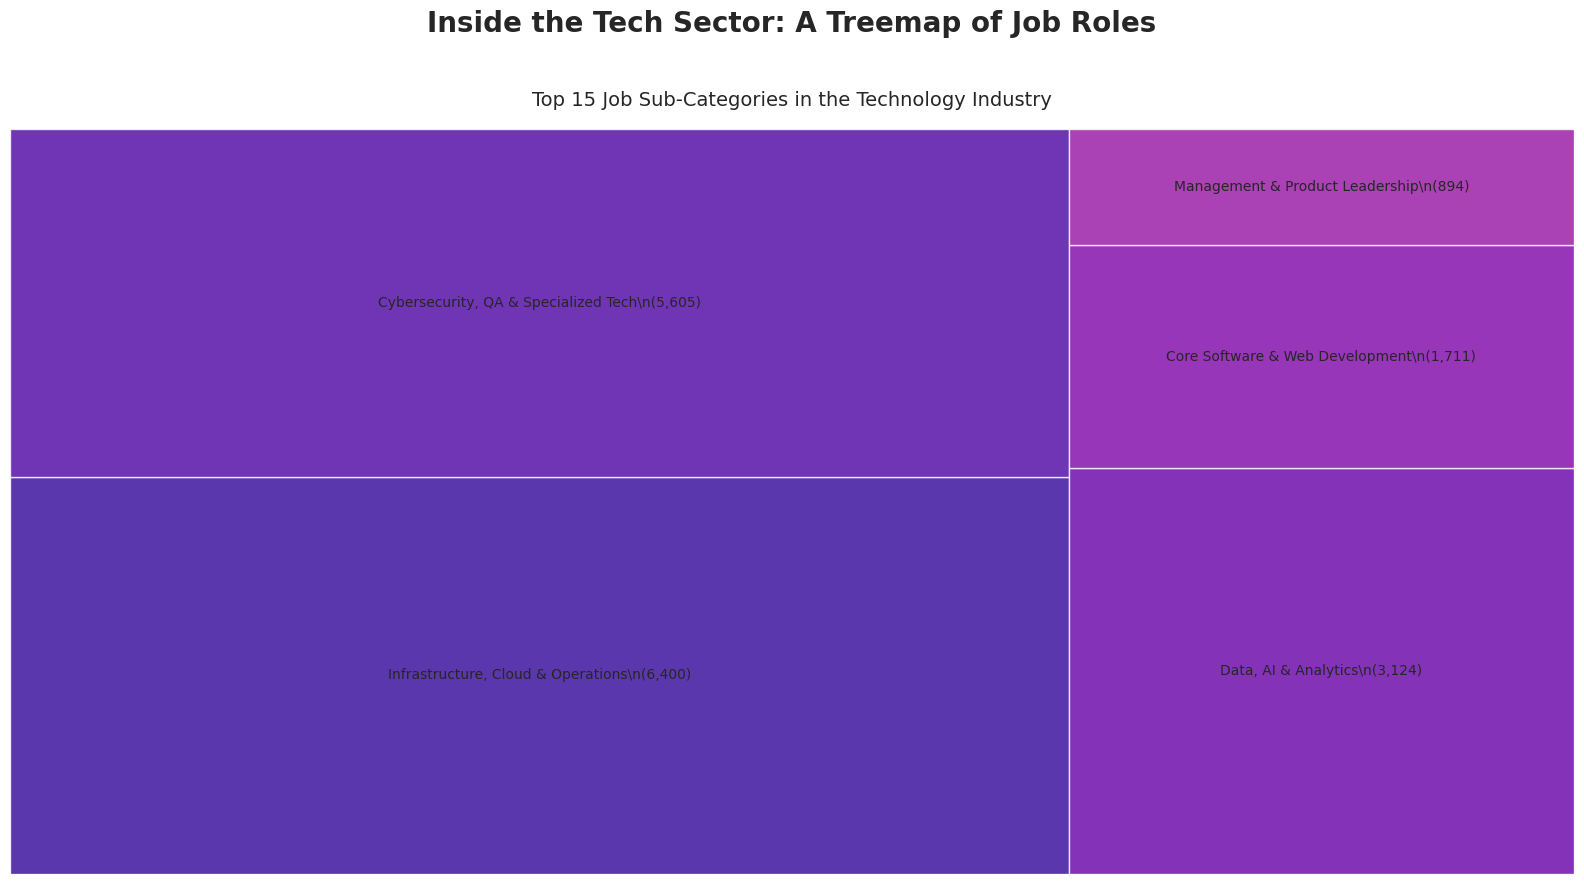

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
# A library for creating treemaps

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\nError: The file was not found at {dashboard_file_path}")
    raise e

tech_df = dashboard_df[dashboard_df['main_category'] == 'Technology']
sub_category_counts = tech_df['sub_category'].value_counts()
top_n = 15
plot_data = sub_category_counts.head(top_n)
labels = [f'{label}\\n({count:,})' for label, count in plot_data.items()]

sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(16, 9))
colors = sns.color_palette("plasma", n_colors=top_n)

squarify.plot(
    sizes=plot_data.values,
    label=labels,
    color=colors,
    alpha=0.8,
    ax=ax,
    text_kwargs={'fontsize':10}
)

fig.suptitle('Inside the Tech Sector: A Treemap of Job Roles', fontsize=20, fontweight='bold')
ax.set_title(f'Top {top_n} Job Sub-Categories in the Technology Industry', fontsize=14, y=1.02)
plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [54]:
# output_path = analysis_folder + 'technology_subcategory_treemap.png'
output_path = analysis_folder + 'graphs_new/technology_subcategory_treemap.png'
plt.savefig(output_path, dpi=300)

print(f"\nTreemap saved to: {output_path}")


Treemap saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/technology_subcategory_treemap.png


<Figure size 640x480 with 0 Axes>

## 5. Hierarchial interactive Treemap for all job category

### A. Color coding based on AI score ( excluding other category )

In [55]:
import pandas as pd
import plotly.express as px

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\nError: The file was not found at {dashboard_file_path}")
    raise e

total_job_count = len(dashboard_df)
df_for_treemap = dashboard_df[dashboard_df['main_category'] != 'Other'].dropna(subset=['main_category', 'sub_category', 'ai_relevance_score'])
jobs_in_chart_count = len(df_for_treemap)

agg_df = df_for_treemap.groupby(['main_category', 'sub_category']).agg(
    job_count=('job_id', 'count'),
    avg_ai_score=('ai_relevance_score', 'mean')
).reset_index()

fig = px.treemap(
    agg_df,
    path=[px.Constant("Defined Categories"), 'main_category', 'sub_category'],
    values='job_count',
    color='avg_ai_score',
    color_continuous_scale='Plasma_r',
    color_continuous_midpoint=agg_df['avg_ai_score'].mean()
)

fig.update_layout(
    title_text='<b>Hierarchical View of AI Relevance Across Defined Job Categories</b>',
    title_x=0.5,
    font=dict(size=12),
    coloraxis_colorbar=dict(title="Avg. AI Score"),
    margin = dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    hovertemplate=(
        '<b>%{label}</b><br>'
        'Job Count: %{value}<br>'
        'Avg. AI Score: %{color:.3f}'
    )
)
output_path_html = analysis_folder + 'graphs_new/nested_treemap_ai_colored_no_other.html'
fig.write_html(output_path_html)
fig.show()

print(f"\nFiltered AI relevance treemap saved to: {output_path_html}")
print("\\n" + "="*80)
print(f"Note: The analysis above considers the {jobs_in_chart_count:,} jobs with a clearly defined main category.")
print(f"The 'Other' category, containing {total_job_count - jobs_in_chart_count:,} jobs, has been excluded for clarity.")
print("="*80)

Dashboard DataFrame loaded successfully!



Filtered AI relevance treemap saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/nested_treemap_ai_colored_no_other.html
\n================================================================================
Note: The analysis above considers the 87,106 jobs with a clearly defined main category.
The 'Other' category, containing 36,743 jobs, has been excluded for clarity.


### B. Color coding based on main category

In [56]:
import pandas as pd
import plotly.express as px
from plotly.colors import sample_colorscale

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'
try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\nError: The file was not found at {dashboard_file_path}")
    raise e

df_for_treemap = dashboard_df.dropna(subset=['main_category', 'sub_category'])

main_categories = df_for_treemap['main_category'].unique()
colors = sample_colorscale('Plasma_r', [n/(len(main_categories)-1) for n in range(len(main_categories))])
color_map = {category: color for category, color in zip(main_categories, colors)}

fig = px.treemap(
    df_for_treemap,
    path=[px.Constant("All Jobs"), 'main_category', 'sub_category'],
    color='main_category',
    color_discrete_map=color_map,
)

fig.update_layout(
    title_text='<b>Hierarchical View of the Entire Job Market</b>',
    title_x=0.5,
    font=dict(size=12),
    margin = dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    hovertemplate='<b>%{label}</b><br>Job Count: %{value}<br>Percentage of Parent: %{percentParent:.2%}',
    root_color="lightgrey"
)
output_path_html = analysis_folder + 'graphs_new/nested_job_market_treemap_category_colored.html'
fig.write_html(output_path_html)
fig.show()

print(f"\nCategory-colored interactive treemap saved to: {output_path_html}")

Dashboard DataFrame loaded successfully!



Category-colored interactive treemap saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/nested_job_market_treemap_category_colored.html


### C. Average AI relevance score per skill per AI job category

Dashboard DataFrame loaded successfully!
\nSkills relevance heatmap saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/skills_relevance_heatmap.png


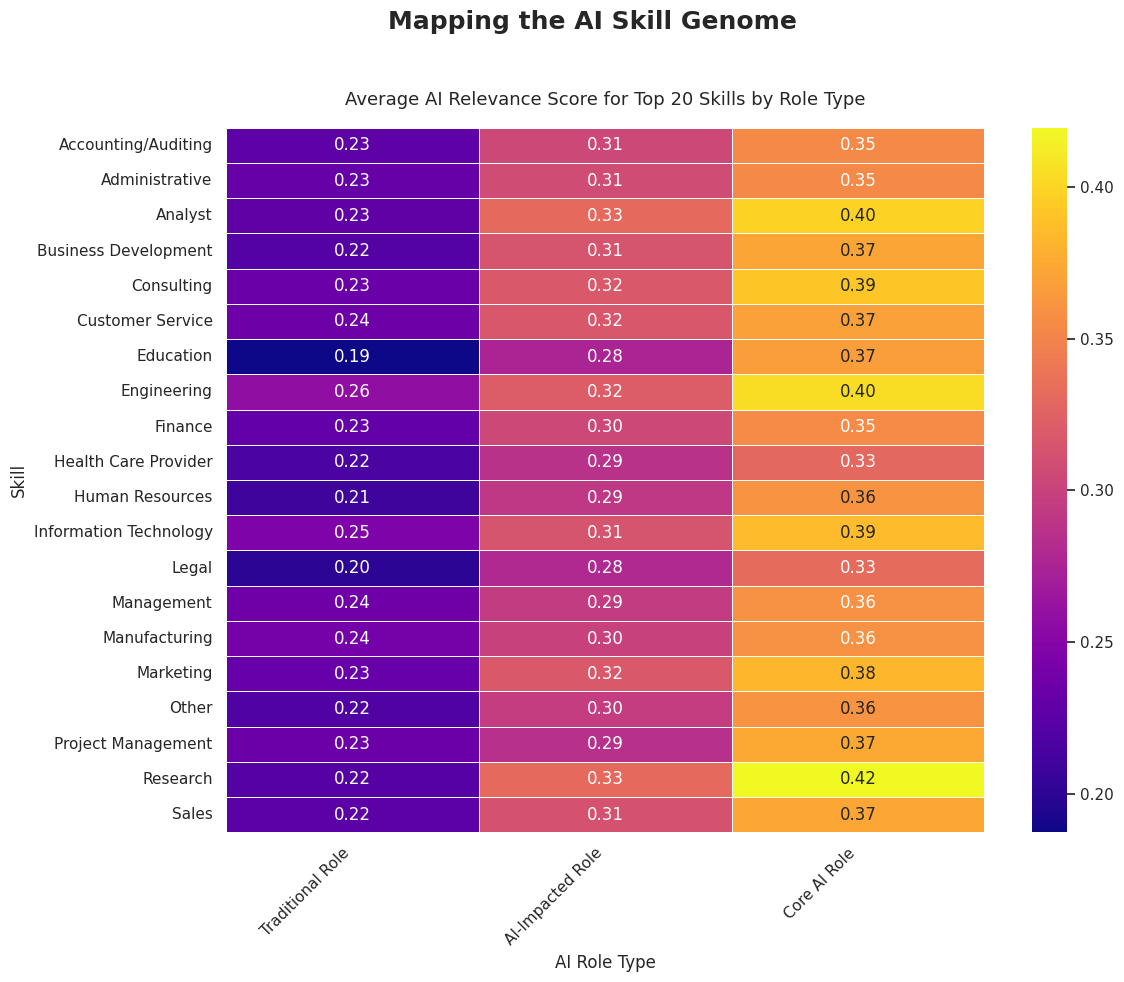

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\\nError: The file was not found at {dashboard_file_path}")
    raise e

skills_df = dashboard_df.dropna(subset=['cleaned_skills']).copy()
skills_df['cleaned_skills'] = skills_df['cleaned_skills'].str.split(', ')
skills_df = skills_df.explode('cleaned_skills')

top_20_skills = skills_df['cleaned_skills'].value_counts().nlargest(20).index
top_skills_df = skills_df[skills_df['cleaned_skills'].isin(top_20_skills)]
heatmap_data = top_skills_df.pivot_table(
    index='cleaned_skills',
    columns='ai_role_type',
    values='ai_relevance_score',
    aggfunc='mean'
)

heatmap_data = heatmap_data[['Traditional Role', 'AI-Impacted Role', 'Core AI Role']]
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='plasma',
    linewidths=.5,
    ax=ax
)

fig.suptitle('Mapping the AI Skill Genome', fontsize=18, fontweight='bold')
ax.set_title('Average AI Relevance Score for Top 20 Skills by Role Type', fontsize=13, y=1.02)
ax.set_xlabel('AI Role Type', fontsize=12)
ax.set_ylabel('Skill', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout(rect=[0, 0, 1, 0.96])

output_path = analysis_folder + 'graphs_new/skills_relevance_heatmap.png'
plt.savefig(output_path, dpi=300)

print(f"\\nSkills relevance heatmap saved to: {output_path}")

### 6. State job graph : using the state_code columm

In [58]:
import pandas as pd
import plotly.express as px

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\\nError: The file was not found at {dashboard_file_path}")
    raise e

state_job_counts = dashboard_df['state_code'].value_counts().reset_index()
state_job_counts.columns = ['state_code', 'job_count']
state_job_counts = state_job_counts[state_job_counts['state_code'] != 'None']

fig = px.choropleth(
    state_job_counts,
    locations='state_code',
    locationmode="USA-states",
    color='job_count',
    color_continuous_scale="Plasma",
    scope="usa"
)

fig.update_layout(
    title_text='<b>Job Openings Across the United States</b>',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa'
    ),
    margin = dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    hovertemplate='<b>%{location}</b><br>Job Count: %{z:,}'
)

output_path_html = analysis_folder + 'graphs_new/us_job_openings_map.html'
fig.write_html(output_path_html)
fig.show()

print(f"\nInteractive US map saved to: {output_path_html}")

Dashboard DataFrame loaded successfully!



Interactive US map saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/us_job_openings_map.html


### 7. Skills word cloud

Dashboard DataFrame loaded successfully!
\nRefined word cloud saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/ai_roles_title_wordcloud_v2.png


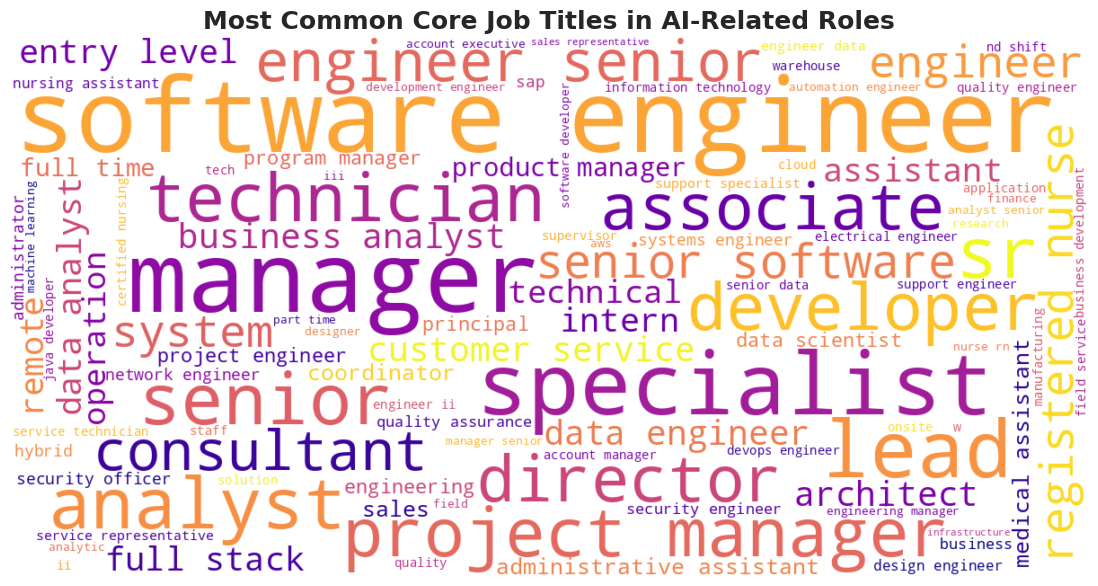

In [59]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\\nError: The file was not found at {dashboard_file_path}")
    raise e

def clean_job_title(title):
    """Normalizes a job title by lowercasing, removing punctuation, and specific modifiers."""
    if not isinstance(title, str):
        return ""

    title = title.lower()
    title = re.sub(r'[^a-z\s]', '', title)

    modifiers_to_remove = [
        'sr', 'jr', 'lead', 'principal', 'ii', 'iii', 'iv',
        'entry level', 'associate', 'staff', 'expert',
        'remote', 'hybrid', 'onsite', 'on site',
        'contract', 'fulltime', 'parttime', 'intern', 'internship', 'temporary'
    ]

    # Creating a regex pattern to match these whole words
    for mod in modifiers_to_remove:
        pattern = r'\\b' + mod + r'\\b'
        title = re.sub(pattern, '', title)

    title = ' '.join(title.split())

    return title

ai_roles_df = dashboard_df[dashboard_df['ai_role_type'].isin(['AI-Impacted Role', 'Core AI Role'])]
cleaned_titles = ai_roles_df['title'].apply(clean_job_title)
cleaned_titles = cleaned_titles[cleaned_titles != '']
text_for_wordcloud = ' '.join(cleaned_titles)


wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='plasma',
    max_words=100,
    contour_width=1,
    contour_color='black'
).generate(text_for_wordcloud)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Core Job Titles in AI-Related Roles', fontsize=18, fontweight='bold')

output_path = analysis_folder + 'graphs_new/ai_roles_title_wordcloud_v2.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"\\nRefined word cloud saved to: {output_path}")

Dashboard DataFrame loaded successfully!
\nWord cloud with 150 job titles saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/ai_roles_title_wordcloud_150.png


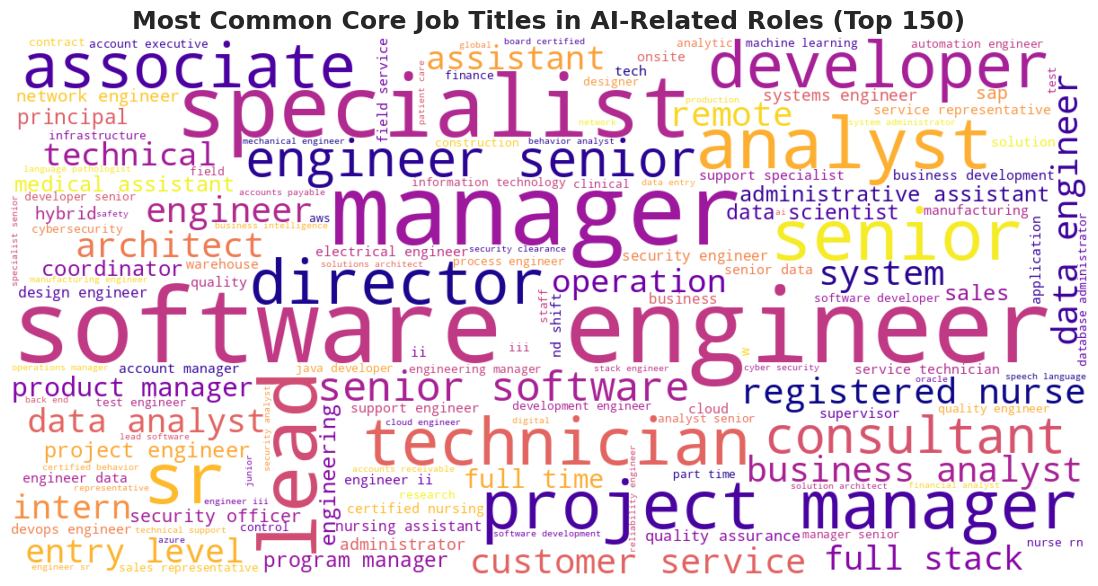

In [60]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\\nError: The file was not found at {dashboard_file_path}")
    raise e

def clean_job_title(title):
    """Normalizes a job title by lowercasing, removing punctuation, and specific modifiers."""
    if not isinstance(title, str):
        return ""

    title = title.lower()
    title = re.sub(r'[^a-z\s]', '', title)

    modifiers_to_remove = [
        'sr', 'jr', 'lead', 'principal', 'ii', 'iii', 'iv',
        'entry level', 'associate', 'staff', 'expert',
        'remote', 'hybrid', 'onsite', 'on site',
        'contract', 'fulltime', 'parttime', 'intern', 'internship', 'temporary'
    ]

    for mod in modifiers_to_remove:
        pattern = r'\\b' + mod + r'\\b'
        title = re.sub(pattern, '', title)

    title = ' '.join(title.split())

    return title


ai_roles_df = dashboard_df[dashboard_df['ai_role_type'].isin(['AI-Impacted Role', 'Core AI Role'])]
cleaned_titles = ai_roles_df['title'].apply(clean_job_title)
cleaned_titles = cleaned_titles[cleaned_titles != '']
text_for_wordcloud = ' '.join(cleaned_titles)

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='plasma',
    max_words=150,
    contour_width=1,
    contour_color='black'
).generate(text_for_wordcloud)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Core Job Titles in AI-Related Roles (Top 150)', fontsize=18, fontweight='bold')

output_path = analysis_folder + 'graphs_new/ai_roles_title_wordcloud_150.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"\\nWord cloud with 150 job titles saved to: {output_path}")

In [61]:
ai_job_count = len(ai_roles_df)
total_job_count = len(dashboard_df)

print(f"\nNote: This word cloud was generated from the titles of {ai_job_count:,} jobs, which includes all roles classified as 'AI-Impacted' and 'Core AI'. "
      f"This represents a subset of the {total_job_count:,} total jobs in the dataset.")



Note: This word cloud was generated from the titles of 34,881 jobs, which includes all roles classified as 'AI-Impacted' and 'Core AI'. This represents a subset of the 123,849 total jobs in the dataset.


### 8.  Sunburst Chart sub-category vs median maximum salary

In [62]:
import pandas as pd
import plotly.express as px

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\\nError: The file was not found at {dashboard_file_path}")
    raise e

total_job_count = len(dashboard_df)
salary_df = dashboard_df[
    (dashboard_df['max_salary'] > 0) &
    (dashboard_df['pay_period'].isin(['YEARLY', 'HOURLY']))
].copy()

def normalize_salary(salary, period):
    if period == 'YEARLY':
        return salary
    elif period == 'HOURLY':
        return salary * 40 * 52
        # 40 hours/week, 52 weeks/year
    return None

salary_df['normalized_max_salary'] = salary_df.apply(lambda row: normalize_salary(row['max_salary'], row['pay_period']), axis=1)
salary_df_filtered = salary_df[salary_df['main_category'] != 'Other'].dropna(subset=['normalized_max_salary', 'main_category', 'sub_category'])
jobs_in_chart_count = len(salary_df_filtered)

agg_df = salary_df_filtered.groupby(['main_category', 'sub_category']).agg(
    job_count=('job_id', 'count'),
    median_max_salary=('normalized_max_salary', 'median')
).reset_index()

fig = px.sunburst(
    agg_df,
    path=['main_category', 'sub_category'],
    values='job_count',
    color='median_max_salary',
    color_continuous_scale='Plasma_r',
    color_continuous_midpoint=agg_df['median_max_salary'].quantile(0.5)
)

fig.update_layout(
    title_text='<b>Salary Landscape: Job Volume vs. Median Maximum Salary</b>',
    title_x=0.5,
    font=dict(size=12),
    coloraxis_colorbar=dict(title="Median Max Salary (USD)"),
    margin = dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    hovertemplate=(
        '<b>%{label}</b><br>'
        'Job Count: %{value}<br>'
        'Median Max Salary: $%{color:,.0f}'
    )
)

output_path_html = analysis_folder + 'sunburst_max_salary_by_category.html'
fig.write_html(output_path_html)
fig.show()

print(f"\nInteractive sunburst chart saved to: {output_path_html}")
print("\n" + "="*80)
print(f"Note: This analysis is based on the {jobs_in_chart_count:,} jobs (out of {total_job_count:,} total) that provided valid maximum salary information "
      "and a 'YEARLY' or 'HOURLY' pay period. The 'Other' job category has been excluded for clarity.")
print("="*80)

Dashboard DataFrame loaded successfully!



Interactive sunburst chart saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/sunburst_max_salary_by_category.html

Note: This analysis is based on the 22,336 jobs (out of 123,849 total) that provided valid maximum salary information and a 'YEARLY' or 'HOURLY' pay period. The 'Other' job category has been excluded for clarity.


In [63]:
import pandas as pd
import plotly.express as px

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
except FileNotFoundError as e:
    print(f"\\nError: The file was not found at {dashboard_file_path}")
    raise e

total_job_count = len(dashboard_df)
salary_df = dashboard_df[
    (dashboard_df['max_salary'] > 0) &
    (dashboard_df['pay_period'].isin(['YEARLY', 'HOURLY']))
].copy()

def normalize_salary(salary, period):
    if period == 'YEARLY':
        return salary
    elif period == 'HOURLY':
        return salary * 40 * 52
    return None

salary_df['normalized_max_salary'] = salary_df.apply(lambda row: normalize_salary(row['max_salary'], row['pay_period']), axis=1)
salary_df_filtered = salary_df[salary_df['main_category'] != 'Other'].dropna(subset=['normalized_max_salary', 'main_category', 'sub_category'])
jobs_in_chart_count = len(salary_df_filtered)

agg_df = salary_df_filtered.groupby(['main_category', 'sub_category']).agg(
    job_count=('job_id', 'count'),
    median_max_salary=('normalized_max_salary', 'median')
).reset_index()

fig = px.sunburst(
    agg_df,
    path=['main_category', 'sub_category'],
    values='job_count',
    color='median_max_salary',
    color_continuous_scale='Plasma_r',
    color_continuous_midpoint=agg_df['median_max_salary'].quantile(0.5)
)

fig.update_layout(
    title_text='<b>Salary Landscape: Job Volume vs. Median Maximum Salary</b>',
    title_x=0.5,
    font=dict(size=12),
    coloraxis_colorbar=dict(title="Median Max Salary (USD)"),
    margin = dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    hovertemplate=(
        '<b>%{label}</b><br>'
        'Job Count: %{value}<br>'
        'Median Max Salary: $%{color:,.0f}'
    )
)

output_path_html = analysis_folder + 'graphs_new/sunburst_max_salary_by_category.html'
fig.write_html(output_path_html)
fig.show()

print(f"\nInteractive sunburst chart saved to: {output_path_html}")
print("\n")
print("\n" + "="*80)
print(f"Note: This analysis is based on the {jobs_in_chart_count:,} jobs (out of {total_job_count:,} total) that provided valid maximum salary information "
      "and a 'YEARLY' or 'HOURLY' pay period. The 'Other' job category has been excluded for clarity.")
print("="*80)


Interactive sunburst chart saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/sunburst_max_salary_by_category.html



Note: This analysis is based on the 22,336 jobs (out of 123,849 total) that provided valid maximum salary information and a 'YEARLY' or 'HOURLY' pay period. The 'Other' job category has been excluded for clarity.


### Visualizing Skills : Top 15 by AI Lift Score

Dashboard DataFrame loaded successfully!


/tmp/ipython-input-1784325104.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




\nAI lift skills chart saved to: /content/drive/My Drive/job-analysis/job-analysis-dataset/analysis/graphs_new/top_skills_by_ai_lift.png


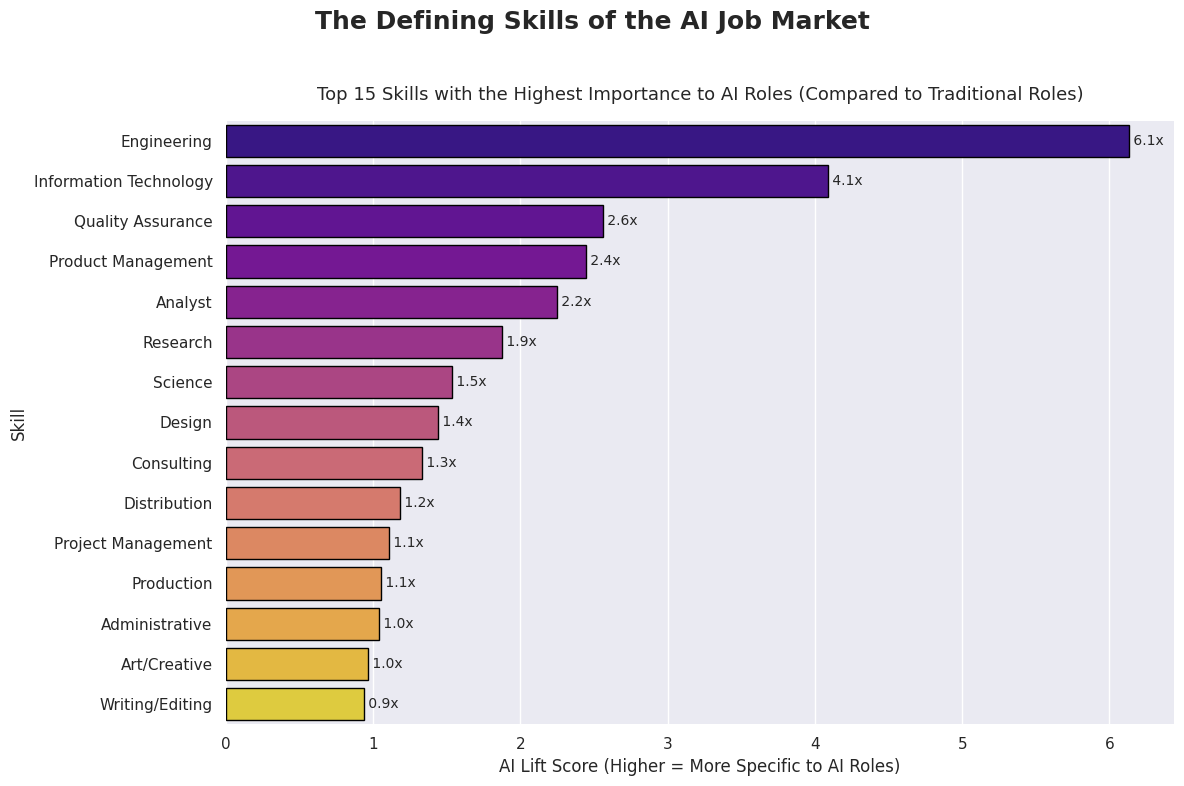

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
analysis_folder = base_path + 'analysis/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    print("Dashboard DataFrame loaded successfully!")
except FileNotFoundError as e:
    print(f"\\nError: The file was not found at {dashboard_file_path}")
    raise e

ai_roles_df = dashboard_df[dashboard_df['ai_role_type'].isin(['AI-Impacted Role', 'Core AI Role'])].copy()
traditional_df = dashboard_df[dashboard_df['ai_role_type'] == 'Traditional Role'].copy()

def get_skill_counts(df):
    return df['cleaned_skills'].dropna().str.split(', ').explode().value_counts()

ai_skill_counts = get_skill_counts(ai_roles_df)
traditional_skill_counts = get_skill_counts(traditional_df)

lift_df = pd.DataFrame({
    'ai_count': ai_skill_counts,
    'traditional_count': traditional_skill_counts
}).fillna(0)

lift_df['ai_freq'] = lift_df['ai_count'] / lift_df['ai_count'].sum()
lift_df['traditional_freq'] = lift_df['traditional_count'] / lift_df['traditional_count'].sum()
lift_df['lift'] = lift_df['ai_freq'] / (lift_df['traditional_freq'] + 1e-9)

significant_skills = lift_df[lift_df['ai_count'] > 100]
top_lift_skills = significant_skills.sort_values('lift', ascending=False).head(15)

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x=top_lift_skills['lift'],
    y=top_lift_skills.index,
    edgecolor='black',
    palette='plasma',
    ax=ax
)

fig.suptitle('The Defining Skills of the AI Job Market', fontsize=18, fontweight='bold')
ax.set_title('Top 15 Skills with the Highest Importance to AI Roles (Compared to Traditional Roles)', fontsize=13, y=1.02)
ax.set_xlabel('AI Lift Score (Higher = More Specific to AI Roles)', fontsize=12)
ax.set_ylabel('Skill', fontsize=12)

for index, value in enumerate(top_lift_skills['lift']):
    ax.text(value, index, f' {value:.1f}x', va='center', fontsize=10)

sns.despine(left=True, bottom=True)
plt.tight_layout(rect=[0, 0, 1, 0.96])

output_path = analysis_folder + 'graphs_new/top_skills_by_ai_lift.png'
plt.savefig(output_path, dpi=300)

print(f"\\nAI lift skills chart saved to: {output_path}")

## Extras

### hierarchical tree for all job categories
-Color coding based on AI score ( including other category )

In [65]:
# import pandas as pd
# import plotly.express as px

# # --- Step 1: Define File Paths ---
# base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
# data_folder = base_path + 'data_cleaning/'
# analysis_folder = base_path + 'analysis/'
# dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

# # --- Step 2: Load and Prepare the DataFrame ---
# try:
#     dashboard_df = pd.read_csv(dashboard_file_path)
#     print("Dashboard DataFrame loaded successfully!")
# except FileNotFoundError as e:
#     print(f"\nError: The file was not found at {dashboard_file_path}")
#     raise e

# # Drop rows with missing values in key columns
# df_for_treemap = dashboard_df.dropna(subset=['main_category', 'sub_category', 'ai_relevance_score'])

# # --- Step 3: Aggregate Data ---
# # We need to calculate the job count and average AI score for each sub-category
# agg_df = df_for_treemap.groupby(['main_category', 'sub_category']).agg(
#     job_count=('job_id', 'count'),
#     avg_ai_score=('ai_relevance_score', 'mean')
# ).reset_index()


# # --- Step 4: Create the Nested Treemap with Continuous Color ---
# fig = px.treemap(
#     agg_df,
#     path=[px.Constant("All Jobs"), 'main_category', 'sub_category'],
#     values='job_count',
#     color='avg_ai_score', # Color the boxes based on the average AI score
#     color_continuous_scale='Plasma_r', # Use the plasma palette as a gradient
#     color_continuous_midpoint=agg_df['avg_ai_score'].mean() # Center the color scale on the mean score
# )

# # --- Step 5: Formatting and Beautification ---
# fig.update_layout(
#     title_text='<b>Hierarchical View of AI Relevance Across the Job Market</b>',
#     title_x=0.5,
#     font=dict(size=12),
#     coloraxis_colorbar=dict(title="Avg. AI Score"),
#     margin = dict(t=50, l=25, r=25, b=25)
# )

# # Add borders and update hover information
# fig.update_traces(
#     marker_line_color='black',
#     marker_line_width=1.5,
#     hovertemplate=(
#         '<b>%{label}</b><br>'
#         'Job Count: %{value}<br>'
#         'Avg. AI Score: %{color:.3f}'
#     )
# )

# # --- Step 6: Save and Show the Plot ---
# output_path_html = analysis_folder + 'nested_job_market_treemap_ai_colored.html'
# fig.write_html(output_path_html)
# fig.show()

# print(f"\nColor-corrected interactive treemap saved to: {output_path_html}")

### using skills section : Identifying top 15 skills across all job posting

In [66]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mticker

# # --- Step 1: Define File Paths ---
# base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
# data_folder = base_path + 'data_cleaning/'
# analysis_folder = base_path + 'analysis/'
# dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'

# # --- Step 2: Load the Main DataFrame ---
# try:
#     dashboard_df = pd.read_csv(dashboard_file_path)
#     print("Dashboard DataFrame loaded successfully!")
# except FileNotFoundError as e:
#     print(f"\nError: The file was not found at {dashboard_file_path}")
#     raise e

# # --- Step 3: Prepare the Skills Data ---
# # Drop rows with missing skills and split the skills string into a list of skills
# skills_series = dashboard_df['cleaned_skills'].dropna().str.split(', ')

# # Explode the series to have one skill per row, then get the value counts
# top_skills = skills_series.explode().value_counts().nlargest(15)


# # --- Step 4: Create the Bar Chart ---
# sns.set_theme(style="darkgrid")
# fig, ax = plt.subplots(figsize=(12, 8))

# sns.barplot(
#     x=top_skills.values,
#     y=top_skills.index,
#     palette='plasma',
#     ax=ax
# )

# # --- Step 5: Formatting ---
# fig.suptitle('The Most In-Demand Competencies', fontsize=18, fontweight='bold')
# ax.set_title('Top 15 Most Frequently Mentioned Skills Across All Job Postings', fontsize=13, y=1.02)

# ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# ax.set_xlabel('Number of Job Postings', fontsize=12)
# ax.set_ylabel('Skill', fontsize=12)

# # Add data labels to the bars
# for index, value in enumerate(top_skills.values):
#     ax.text(value, index, f' {value:,}', va='center', fontsize=10)


# sns.despine(left=True, bottom=True)
# plt.tight_layout(rect=[0, 0, 1, 0.96])

# # --- Step 6: Save the Plot ---
# output_path = analysis_folder + 'top_15_overall_skills.png'
# plt.savefig(output_path, dpi=300)

# print(f"\nTop skills chart saved to: {output_path}")